<a href="https://colab.research.google.com/github/PeddinaSupraja/Gen-AI/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

csv_df = pd.read_csv("orders.csv")
csv_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [9]:
json_df = pd.read_json("users.json")
json_df.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [31]:
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [32]:
merged_df = pd.merge(
    orders_df,
    users_df,
    on="user_id",
    how="left"
)

In [33]:
final_df = pd.merge(
    merged_df,
    restaurants_df,
    on="restaurant_id",
    how="left"
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [35]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [36]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [37]:
from google.colab import files
files.download("final_food_delivery_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_df = pd.read_csv("final_food_delivery_dataset.csv")

/tmp/ipython-input-1541048976.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


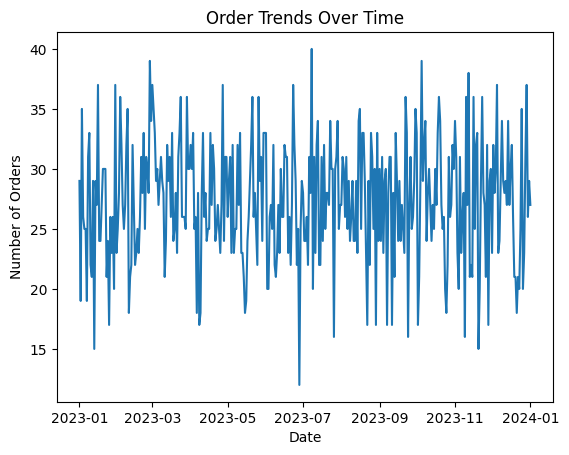

In [39]:
# Convert order date to datetime
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

# Orders per day
orders_over_time = final_df.groupby(final_df['order_date'].dt.date).size()

plt.figure()
orders_over_time.plot()
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.title("Order Trends Over Time")
plt.show()


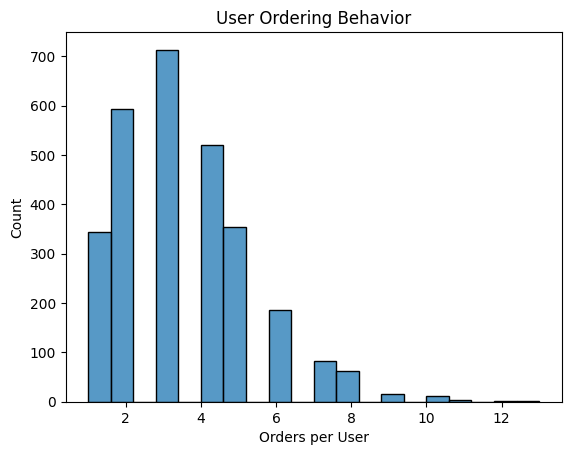

In [40]:
user_orders = final_df.groupby('user_id').size()

plt.figure()
sns.histplot(user_orders, bins=20)
plt.xlabel("Orders per User")
plt.title("User Ordering Behavior")
plt.show()

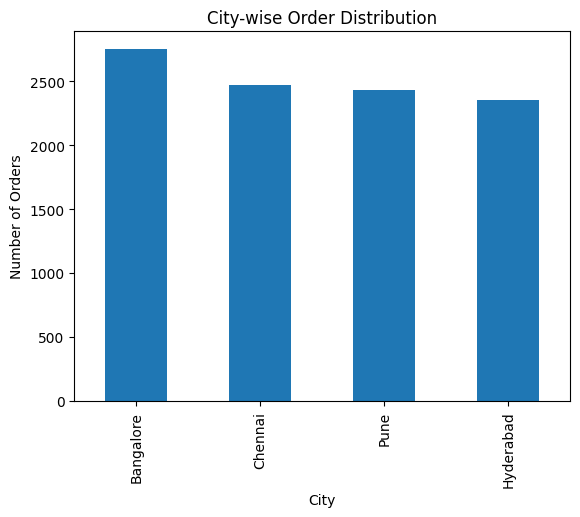

In [41]:
city_orders = final_df.groupby('city').size().sort_values(ascending=False)

plt.figure()
city_orders.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.title("City-wise Order Distribution")
plt.show()